In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 716.7 kB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.5/865.5 kB 6.6 MB/s eta 0:00:00a 0:00:01


In [2]:
from ultralytics import YOLO

import time
import torch
import cv2
import torch.backends.cudnn as cudnn
from PIL import Image
import colorsys
import numpy as np

In [4]:
model = YOLO("/kaggle/input/requirements/best.pt")

In [9]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([], device='cuda:0')
conf: tensor([], device='cuda:0')
data: tensor([], device='cuda:0', size=(0, 6))
id: None
is_track: False
orig_shape: (848, 480)
shape: torch.Size([0, 6])
xywh: tensor([], device='cuda:0', size=(0, 4))
xywhn: tensor([], device='cuda:0', size=(0, 4))
xyxy: tensor([], device='cuda:0', size=(0, 4))
xyxyn: tensor([], device='cuda:0', size=(0, 4))

In [24]:
color = [256, 256, 256]

In [39]:
from collections import defaultdict

import cv2
import numpy as np

from ultralytics import YOLO

# Load the YOLOv8 model
#model = YOLO("yolov8n.pt")
bill = {"bottles":0}
# Open the video file
video_path = "/kaggle/input/requirements/bottles.mp4"
cap = cv2.VideoCapture(video_path)

#output file
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

prev_flag = 0
curr_flag = 0
place = "Outside"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
output_path = '/kaggle/working/output.mp4'
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

# Store the track history
track_history = defaultdict(lambda: [])
c =0

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()
    if success:
        c += 1
        #if c == 100:
         #   break
        results = model.predict(frame)
        if results[0].boxes.cls == None:
            out.write(frame)
            continue
        # Get the boxes and track IDs
       # boxes = results[0].boxes.xywh.cpu()
        #track_ids = results[0].boxes.id.int().cpu().tolist()

        # Visualize the results on the frame
        xyxys = results[0].boxes.xyxy
        classes = results[0].boxes.cls
        ids = results[0].boxes.id
        for i, (xyxy, cls) in enumerate(zip(xyxys, classes)):
            x1,y1,x2,y2 = xyxy
            y_mid = (y1 + y2) / 2
            if y_mid > 202:
                curr_flag = 1
                if prev_flag == 0:
                    bill["bottles"] += 1
            else:
                curr_flag = 0
                if prev_flag == 1:
                    bill["bottles"] -= 1
            #cv2.putText(frame, f"place", (0, 0))
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), color, 2)
            cv2.putText(frame, f"cls: {cls}", (int(x1), int(y1 - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
        cv2.putText(frame, f"bill - bottles : {bill['bottles']}", (10, 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
        # Plot the tracks
        '''for box, track_id in zip(boxes, track_ids):
            x, y, w, h = box
            track = track_history[track_id]
            track.append((float(x), float(y)))  # x, y center point
            if len(track) > 30:  # retain 90 tracks for 90 frames
                track.pop(0)'''

            # Draw the tracking lines
        points = np.array([[252, 192], [551, 202]])
        cv2.polylines(frame, [points], isClosed=False, color=(230, 230, 230), thickness=10)

        # Display the annotated frame
        #cv2.imshow("YOLOv8 Tracking", annotated_frame)
        #out_frame = cv2.cvtColor(annotated_frame, cv2.COLOR_RGB2BGR)
        out.write(frame)
        prev_flag = curr_flag

        # Break the loop if 'q' is pressed
        #if cv2.waitKey(1) & 0xFF == ord("q"):
          #  break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
out.release()


0: 384x640 (no detections), 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.9ms
Speed: 2.3ms preprocess, 6.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.7ms
Speed: 2.3ms preprocess, 6.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.7ms
Speed: 1.7ms preprocess, 6.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.5ms
Speed: 1.7ms preprocess, 6.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.5ms
Speed: 1.7ms preprocess, 6.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.5ms
Speed: 1.7ms preprocess, 6.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.5ms
Speed: 1.7ms preprocess, 6.5ms inference, 0.5ms 

In [15]:
import matplotlib.pyplot as plt

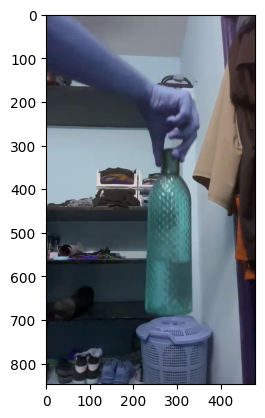

In [16]:
plt.imshow(frame)

In [18]:
res = model.predict(frame)


0: 640x384 1 Water-Bottle, 9.3ms
Speed: 2.2ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


In [20]:
res[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.8597], device='cuda:0')
data: tensor([[222.8127, 325.0927, 338.2872, 617.8595,   0.8597,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (848, 480)
shape: torch.Size([1, 6])
xywh: tensor([[280.5500, 471.4761, 115.4745, 292.7668]], device='cuda:0')
xywhn: tensor([[0.5845, 0.5560, 0.2406, 0.3452]], device='cuda:0')
xyxy: tensor([[222.8127, 325.0927, 338.2872, 617.8595]], device='cuda:0')
xyxyn: tensor([[0.4642, 0.3834, 0.7048, 0.7286]], device='cuda:0')